## Instrumental Variables

### Purpose of Instrumental Variables
- 만약 우리가 관측할 수 없는 교란변수들을 가지고 있다면, 도구변수를 활용한 인과추론 방법을 고려해봐야 한다.

- 도구변수는 다음의 가정을 만족해야 한다.
  
    - relevance: 도구변수는 처치변수와 관련이 있어야 된다.
  
    - 도구변수는 Error Term과 상관관계가 없어야 된다.
  
        - Exclusion Restriction: 도구변수는 Treatment를 통해서만 $Y$에 영향을 미칠 수 있다. 즉, 도구변수는 Treatment에 의해 간접적으로 $Y$에 영향을 주지만,직접적인 영향 ($Z$ -> $Y$)을 줄 수 없다.
  
        - Exogeneity: 도구변수와 $Y$에 영향을 주는 교란요인이 없어야 한다.
  
- 즉, 도구변수는 오직 처치변수($D$)를 통해서 $Y$에 영향을 미쳐야 한다.

### Homogeneous Treatment Effects

#### Omitted Variable Bias
- 관측할 수 없는 변수가 있을 때, 편향을 확인해보자.
  
- $Y$ = 결과 변수, $S$ = 처치 변수, $A$ = 관측할 수 없는 변수, $\varepsilon$ = 오차
\begin{align}
   Y_i = \alpha + \delta S_i + \gamma A_i + \varepsilon_i
\end{align}

\begin{align}
   Y_i = \alpha + \delta S_i + \eta_i, \quad \eta_i = \gamma A_i + \varepsilon_i
\end{align}

\begin{align}
   \widehat{\delta} = \dfrac{C(Y,S)}{V(S)} = \dfrac{E[YS] - E[Y]E[S]}{V(S)}
\end{align}

\begin{align}
   \widehat{\delta} & = \dfrac{E\big[\alpha S + S^2 \delta + \gamma SA + \varepsilon S\big] - E(S)E\big[\alpha + \delta S + \gamma A + \varepsilon\big]}{V(S)}
   \\
    & = \dfrac{ \delta E(S^2) - \delta E(S)^2 + \gamma E(AS) - \gamma E(S)E(A) + E(\varepsilon S) - E(S)E(\varepsilon)}{V(S)}                  
   \\
    & = \delta + \gamma \dfrac{C(AS)}{V(S)}                                                                                                    
\end{align}
- 위 식을 보면, $\gamma \dfrac{C(AS)}{V(S)}$ 의 편향이 발생하게 된다.

#### Instrumental Variables by Hand
- 도구변수를 활용하여 편향의 문제를 해결해보자.
\begin{align}
   C(Y,Z) & = C(\alpha + \delta S+\gamma A+\varepsilon, Z)                                                    \\
          & = E\big[(\alpha+\delta S+\gamma A+\varepsilon),Z] - E(S) E(Z)                                   
   \\
          & =\big\{\alpha E(Z)- \alpha E(Z)\big\} + \delta \big\{E(SZ) - E(S)E(Z)\big\}                     \\
          & \quad + \gamma \big\{E(AZ) - E(A)E(Z)\big\} + \big\{E(\varepsilon Z) - E(\varepsilon)E(Z)\big\}
   \\
          & =\delta C(S,Z) + \gamma C(A,Z) + C(\varepsilon, Z)                                              
\end{align}
- 도구변수의 가정에 따라 $C(A,Z)=0$, $C(\varepsilon,Z)=0$ 이므로 $\widehat{\delta} = \dfrac{C(Y,Z)}{C(S,Z)}$ 이다.

#### Two-stage least squares
- 2단계 최소 제곱법을 통해서 도구변수를 직관적으로 확인해보자.
  
- 아래 방정식을 통해 두 가지의 가정이 충족되어야 함을 알 수 있다.
   - $C(Z,\varepsilon)=0$ and $\beta \neq 0$
\begin{align}
   Y_i & = \alpha + \delta S_i + \varepsilon_i
   \\
   S_i & = \gamma + \beta Z_i + \epsilon_i     
\end{align}
- 위 방정식에 따라 $\widehat{\delta} = \dfrac{C(Y,Z)}{C(S,Z)}$ 식에 분모, 분자 각 $V(Z)$ 을 나누게 되면 $\dfrac{ \dfrac{C(Z,Y)}{V(Z)} }{\dfrac{ C(Z,S)}{V(Z)}} = \dfrac{\text{Reduced Form}}{\text{1st Stage}}$ 을 구할 수 있다.
   - $\widehat{\beta} = \dfrac{ C(Z,S)}{V(Z)}$ 이며  $\widehat{\beta}V(Z) = C(Z,S)$ 식과 동일하다.              
- 따라서 아래와 같이 재해석 할 수 있다.
  
   - 아래 식이 의미하는 바는 exogenous한 부분만 고려하여 $\widehat{S}$ 와 $Y$의 인과관계를 추정하는 것이다.
  
   - exogenous 한 이유
      - $C(S,\varepsilon) \neq 0$ 처럼 endogenous 하지만, $\widehat{S}$ 를 고려하면 $C(\widehat{S},\varepsilon) = C(\widehat{\gamma} + \widehat{\beta}Z,\varepsilon) = \widehat{\gamma}C(1,\varepsilon) + \widehat{\beta}C(Z,\varepsilon) = 0$ 이기 때문이다.
      - $\underbrace{C(Z,\varepsilon) = 0}_{\text{by exclusion restriction}}$
      
\begin{align}
   \widehat{\delta}_{IV} & =\dfrac{ C(Z,Y)}{C(Z,S)}                                 
   \\
        & =\dfrac{\widehat{\beta}C(Z,Y)}{\widehat{\beta} C(Z,S)}   
   \\
        & =\dfrac{ \widehat{\beta} C(Z,Y)}{\widehat{\beta}^2 V(Z)}
   \\
        & = \dfrac{C(\widehat{\beta}Z,Y)}{V(\widehat{\beta}Z)}   
   \\
        & = \dfrac{C(\widehat{S},Y)}{V(\widehat{S})}  
\end{align}

- 따라서 도구변수가 더미변수라면 다음의 식으로 추정된다.
   - Wald Estimator 으로 불린다.
\begin{align}
   \widehat{\delta}_{IV} & =\dfrac{ C(Z,Y)}{C(Z,S)}
\\
      & = \dfrac{C(\widehat{S},Y)}{V(\widehat{S})}
\\
      & =\dfrac{E[Y|Z=1]-E[Y|Z=0]}{E[S|Z=1]-E[S|Z=0]}
\end{align}

#### Instrument Variables Example
- 도구변수를 활용하여 교육이 임금에 미치는 영향을 추정해보자.
  
    - 도구변수는 출생 분기를 활용한다. (Q1, Q2, Q3, Q4)
  
        - 미국 정책에 의해 Q4에 태어난 사람은 Q1에 태어난 사람보다 더 많은 교육을 들어야 되기 때문에 도구변수는 교육에 영향을 미치게 된다.
  
        - 출생 분기와 임금에 영향을 미치는 교란요인은 존재하지 않는다.

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import graphviz as gr
from linearmodels.iv import IV2SLS

%matplotlib inline

pd.set_option("display.max_columns", 5)
style.use("fivethirtyeight")

- 데이터 불러오기

In [ ]:
data = pd.read_csv("C:\\Users\\이찬영\\Desktop\\asciiqob.csv")
data.head()

- 첫 번째 도구변수 가정 확인하기

    - $Cov(Z, D) \neq 0$
  
        - 아래 시각화를 통해 분기마다 학교 교육의 계절성이 있다는 사실을 알 수 있다.

In [6]:
group_data = (data
              .groupby(["year_of_birth", "quarter_of_birth"])
              [["log_wage", "years_of_schooling"]]
              .mean()
              .reset_index()
              .assign(time_of_birth = lambda d: d["year_of_birth"] + (d["quarter_of_birth"])/4))

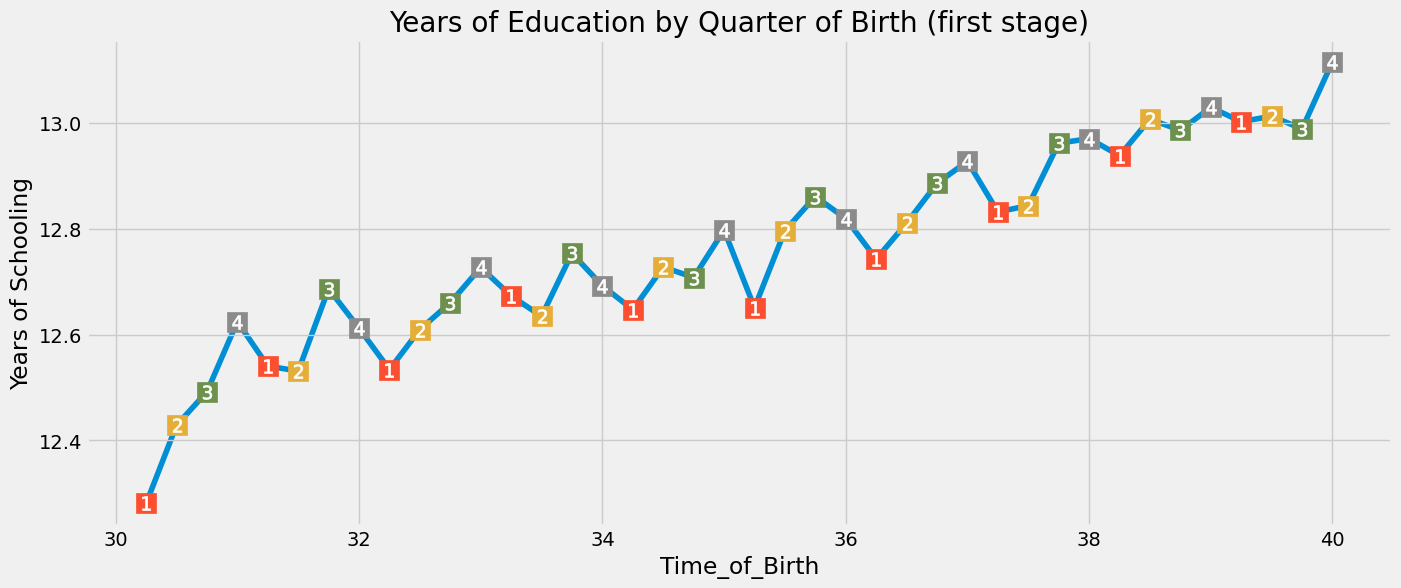

In [14]:
plt.figure(figsize=(15,6))
plt.plot(group_data["time_of_birth"], group_data["years_of_schooling"], zorder=-1)
for q in range(1, 5):
    x = group_data.query(f"quarter_of_birth=={q}")["time_of_birth"]
    y = group_data.query(f"quarter_of_birth=={q}")["years_of_schooling"]
    plt.scatter(x, y, marker="s", s=200, c=f"C{q}")
    plt.scatter(x, y, marker=f"${q}$", s=100, c=f"white")

plt.title("Years of Education by Quarter of Birth (first stage)")
plt.xlabel("Time_of_Birth")
plt.ylabel("Years of Schooling");

- 두 번째 도구변수 가정 확인하기
  
    - Exclusion Restriction: $Y \perp Z | D$
  
    - 사실 두 번째 가정은 정확한 확인이 불가능하다.
  
    - 하지만 도메인 지식을 통해 **"출생 분기는 교육 외에는 수입에 차이를 일으킬만한 요소가 없을 것이다"** 라는 것을 경험적으로 받아들이면서 Exclusion Restriction 가정을 확인해 보는 수밖에 없다. 
  
        - 아래 시각화를 통해 분기마다 임금에 대한 계절성이 있다는 사실을 알 수 있다.

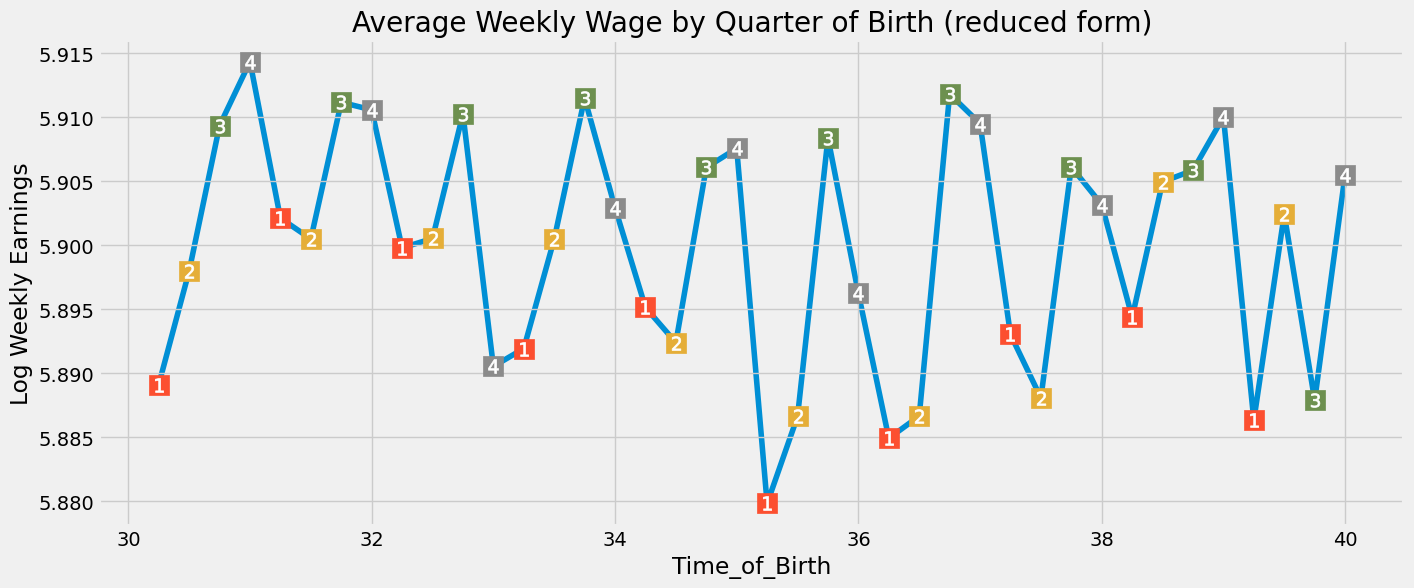

In [15]:
plt.figure(figsize=(15,6))
plt.plot(group_data["time_of_birth"], group_data["log_wage"], zorder=-1)
for q in range(1, 5):
    x = group_data.query(f"quarter_of_birth=={q}")["time_of_birth"]
    y = group_data.query(f"quarter_of_birth=={q}")["log_wage"]
    plt.scatter(x, y, marker="s", s=200, c=f"C{q}")
    plt.scatter(x, y, marker=f"${q}$", s=100, c=f"white")

plt.title("Average Weekly Wage by Quarter of Birth (reduced form)")
plt.xlabel("Time_of_Birth")
plt.ylabel("Log Weekly Earnings");

- 출생분기를 더미변수로 변환

In [8]:
factor_data = data.assign(**{f"q{int(q)}": (data["quarter_of_birth"] == q).astype(int)
                             for q in data["quarter_of_birth"].unique()})

factor_data.head()

,log_wage,years_of_schooling,...,q3,q4
0,5.790019,12.0,...,0,0
1,5.952494,11.0,...,0,0
2,5.315949,12.0,...,0,0
3,5.595926,12.0,...,0,0
4,6.068915,12.0,...,0,0


- Two-stage least squares 추정

    - 추가 교육을 받을 때마다 평균 10%의 수익 증가를 예상해 볼 수 있다.

In [20]:
def parse(model, exog="years_of_schooling"):
    param = model.params[exog]
    se = model.std_errors[exog]
    p_val = model.pvalues[exog]
    print(f"Parameter: {param}")
    print(f"SE: {se}")
    print(f"95 CI: {(-1.96*se,1.96*se) + param}")
    print(f"P-value: {p_val}")

formula = 'log_wage ~ 1 + C(year_of_birth) + C(state_of_birth) + [years_of_schooling ~ q1+q2+q3]'
iv_many_zs = IV2SLS.from_formula(formula, factor_data).fit()
parse(iv_many_zs)

Parameter: 0.1076937048820902
SE: 0.019557149009393492
95 CI: [0.06936169 0.14602572]
P-value: 3.657974678716869e-08


#### Weakness of Instruments
- 도구변수는 처치변수와 상관관계가 낮을 때 표준오차의 값이 증가하므로 추정된 ATE의 편향성이 커지게 된다.
    - 따라서 처치변수와 상관관계가 높은 도구변수를 고려해야 한다.

In [31]:
np.random.seed(12)
n = 10000
X = np.random.normal(0, 2, n) # observable variable
U = np.random.normal(0, 2, n) # unobservable (omitted) variable
D = np.random.normal(1 + 0.5*U, 5, n) # treatment
Y = np.random.normal(2 + X - 0.5*U + 2*D, 5, n) # outcome

stddevs = np.linspace(0.1, 100, 50)
Zs = {f"Z_{z}": np.random.normal(D, s, n) for z, s in enumerate(stddevs)} # instruments with decreasing Cov(Z, T)

sim_data = pd.DataFrame(dict(U=U, D=D, Y=Y)).assign(**Zs)

sim_data.head()

,U,D,...,Z_48,Z_49
0,2.696148,8.056988,...,-117.798705,-13.485292
1,2.570240,0.245067,...,-209.727577,-70.792948
2,0.664741,5.597510,...,60.562232,47.619414
3,1.037725,0.493532,...,78.136513,-108.322304
4,-2.590591,-6.263014,...,78.776566,-80.547214


In [37]:
corr = (sim_data.corr()["D"]
        [lambda d: d.index.str.startswith("Z")])
se = []
ate = []
for z in range(len(Zs)):
    formula = f'Y ~ 1 + X + [D ~ Z_{z}]'
    iv = IV2SLS.from_formula(formula, sim_data).fit()
    se.append(iv.std_errors["D"])
    ate.append(iv.params["D"])

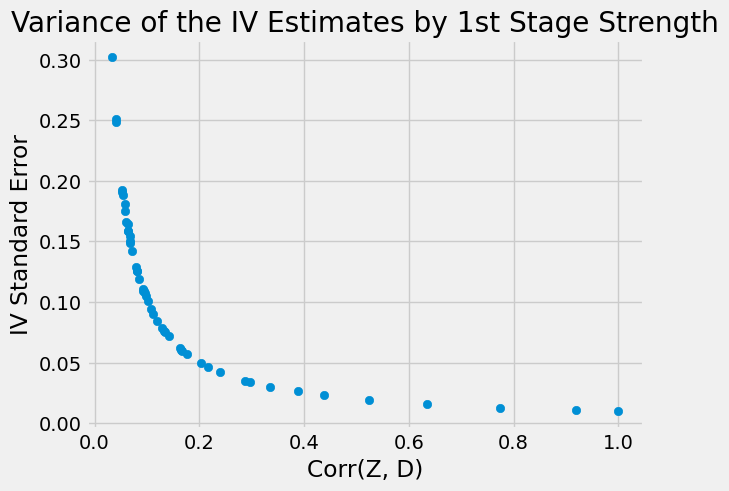

In [34]:
plot_data = pd.DataFrame(dict(se=se, ate=ate, corr=corr)).sort_values(by="corr")

plt.scatter(plot_data["corr"], plot_data["se"])
plt.xlabel("Corr(Z, D)")
plt.ylabel("IV Standard Error");
plt.title("Variance of the IV Estimates by 1st Stage Strength");

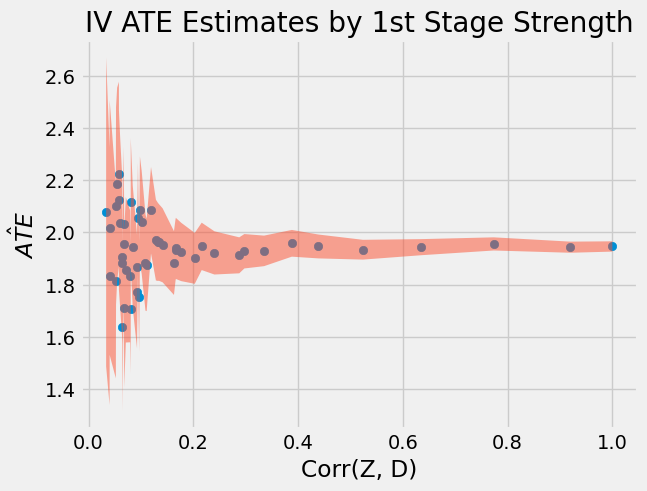

In [35]:
plt.scatter(plot_data["corr"], plot_data["ate"])
plt.fill_between(plot_data["corr"],
                 plot_data["ate"]+1.96*plot_data["se"],
                 plot_data["ate"]-1.96*plot_data["se"], alpha=.5)
plt.xlabel("Corr(Z, D)")
plt.ylabel("$\hat{ATE}$");
plt.title("IV ATE Estimates by 1st Stage Strength");

### Heterogeneous Treatment Effects

#### Local Average Treatment Effect (LATE)
- 사실 도구변수는 도구의 결과로서 행동이 변경되는 특정 그룹의 인과적 효과만 추정한다.
  
    - 도구변수에는 4가지의 그룹으로 정의되는 가운데, **Compliers Group**의 인과효과인 LATE를 추정한다.
  
        - **Compliers**
  
        - Never Takers
  
        - Always Takers
  
        - Defieres
- LATE를 추정하기 위해선 다섯 가지의 가정을 만족해야 된다.

    - SUTVA: $Z_i$는 $D_j$ 와 $Y_j$ 에 영향을 미치지 않으며, $D_i$는 $Y_j$에 영향을 미치지 않는다.

        - 각 사람에 따른 잠재적 결과는 다른 사람에게 영향을 미치지 않는다.
  
    - Independence Assumption: $\Big\{Y_i(D_{i1},1), Y_i(D_{i0},0),D_{i1},D_{i0}\Big\} \perp Z_i$

    - Exclusion Restriction: $Y_i(1, 0)=Y_i(1, 1)=Y_{i1}$ and $Y_i(0, 0)=Y_i(0, 1)=Y_{i0}$
  
        - 도구 변수는 잠재적인 결과에 영향을 미치지 않는다.
  
    - First Stage: $E[D_{i1} - D_{i0}] \ne 0$
  
        - 도구 변수는 Treatment에 영향을 미친다.
  
    - Monotonicity: $D_{i1} > D_{i0}$

- 위 가정을 만족하면 LATE 식은 다음과 같다.
\begin{align}
   \delta_{IV,LATE} & =\dfrac{ \text{Effect of $Z$ on $Y$}}{\text{Effect of $Z$ on $D$}}
   \\
    & =E\big[(Y_{i1}-Y_{i0})\mid D_{i1} > D_{i0}\big]                        
\end{align}
- Wald Estimator을 통해서 LATE 식에 대한 직관을 확인해 보자.
\begin{align}
    ATE = \dfrac{E[Y|Z=1]-E[Y|Z=0]}{E[D|Z=1]-E[D|Z=0]}                     
\end{align}
- $Proof)$
    - 우선, 분자의 $E[Y|Z=1]$는 배제 제약에 따라 Potential Outcome Framework 관점에서 재작성되며, 독립성 가정에 따라 Z에 대한 조건화를 제거할 수 있다.
\begin{align}
    E[Y|Z=1] & = \underbrace{E[Y_{i0} + D_{i1}(Y_{i1} - Y_{i0})|Z=1]}_\text{by Exclusion Restriction} 
    \\    
    & = \underbrace{E[Y_{i0} + D_{i1}(Y_{i1} - Y_{i0})]}_\text{by Independence Assumption}                        
\end{align}
    - 따라서 분자는 위 식에 따라 다음의 식을 얻을 수 있다.
\begin{align}
    E[Y|Z=1]-E[Y|Z=0] & = E[(Y_{i1}-Y_{i0})(D_{i1}-D_{i0})]
\\
    & = \underbrace{E[(Y_{i1}-Y_{i0})|D_{i1}>D_{i0}]P(D_{i1}>D_{i0})}_\text{by Monotonicity}                      
\end{align}
    - 분모의 경우, 단조성 가정을 통해 구할 수 있다.
\begin{align}
    E[D|Z=1]-E[D|Z=0] & = E[D_{i1}-D_{i0}]
\\ 
    & = \underbrace{P(D_{i1}>D_{i0})}_\text{by Monotonicity}                     
\end{align}
    - 위 식의 과정을 통해 LATE 식을 구할 수 있다.
  
        - 아래 식의 의미는 $Z = 1$ 이면, $D = 1$ 이며, $Z = 0$ 이면, $D = 0$의 조건만 고려한다. 즉, **Compliers Group** 만 고려한다.
  
            - **Compliers :** $D_{i1}>D_{i0}$
  
            - Never Takers : $D_{i1}=D_{i0}=0$
  
            - Always Takers : $D_{i1}=D_{i0}=1$
  
            - Defieres : $D_{i1}=0$ and $D_{i0}=1$
\begin{align}
\delta_{IV,LATE} & = \dfrac{E[(Y_{i1}-Y_{i0})|D_{i1}>D_{i0}]P(D_{i1}>D_{i0})}{P(D_{i1}>D_{i0})}
\\
    & = E[(Y_{i1}-Y_{i0})\mid D_{i1}>D_{i0}]                   
\end{align}

#### LATE Example
- 위 예제도 LATE로 추정되었지만, 더 직관적인 예제를 통해서 알아보도록 하자.

- 앱 내 구매에 대한 Push 효과를 추정해보자.

In [40]:
data = pd.read_csv("C:\\Users\\이찬영\\Desktop\\app_engagement_push.csv")
    
data.head()

,in_app_purchase,push_assigned,push_delivered
0,47,1,1
1,43,1,0
2,51,1,1
3,49,0,0
4,79,0,0


- 아래 인과 그래프처럼 push assigned = 1로 무작위 할당을 받았지만, 옛날 스마트폰으로 가지고 있는 사람에게 push delivered = 0으로 Push 알람을 받지 못할 경우도 존재한다. (Never Takers)

- 따라서 우리가 추정할 수 있는 Compiler Group은 비교적 부유한 고객들일 것이다.

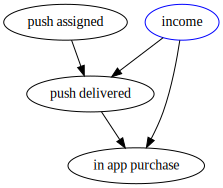

In [42]:
g = gr.Digraph()

g.edge("push assigned", "push delivered")
g.edge("push delivered", "in app purchase")
g.edge("income", "in app purchase")
g.edge("income", "push delivered")
g.node("income", color="blue")
g

- 3.29는 Complier에 대한 $\hat{ATE}$를 뜻한다.

- 즉, 최신 스마트폰을 가지고 있는 그룹(Complier Group)에 대하여 해당 Push 마케팅이 미치는 결과를 추정한다고 해석할 수 있다.

In [43]:
iv = IV2SLS.from_formula("in_app_purchase ~ 1 + [push_delivered ~ push_assigned]", data).fit()
iv.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
Intercept,69.292,0.3624,191.22,0.0000,68.581,70.002
push_delivered,3.2938,0.7165,4.5974,0.0000,1.8896,4.6981
